In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [94]:
# data for tensile strength of 15 composite materials
# X is composition of the materials (x%)
X = np.array([[3.4], [1.8], [4.6], [2.3], [3.1], 
              [5.5], [0.7], [3.0], [2.6], [4.3], 
              [2.1], [1.1], [6.1], [4.8], [3.8]])

# y is tensile strength (Gpa)
y = np.array([[26.2], [17.8], [31.3], [23.1], [27.5], 
              [36.0], [14.1], [22.3], [19.6], [31.3], 
              [24.0], [17.3], [43.2], [36.4], [26.1]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [95]:
def cross_val_alpha(X, X_test, X_train, y_test, y_train):
    # cross validation
    l_min = 0.005
    l_max = 0.8
    l_num = 20
    lambdas = np.linspace(l_min,l_max, l_num)
    
    train_r_squared = np.zeros(l_num)
    test_r_squared = np.zeros(l_num)

    pred_num = X.shape[1]
    coeff_a = np.zeros((l_num, pred_num))

    for ind, i in enumerate(lambdas):    
        reg = linear_model.Lasso(alpha = i)
        reg.fit(X_train, y_train)
        results = cross_val_score(reg, X, y, cv=5, scoring="r2")
        
        train_r_squared[ind] = reg.score(X_train, y_train)
        test_r_squared[ind] = reg.score(X_test, y_test)

    # #optional plot
    plt.figure(figsize=(10, 5))
    plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
    plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
    plt.xlabel('Lamda value'); plt.ylabel(r'$R^2$')
    plt.xlim(0, 19)
    plt.title(r'Evaluate 5-fold cv with different lamdas')
    plt.legend(loc='best')
    plt.grid()

    df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
    df_lam['lambda'] = (lambdas)
    # returns the index of the row where column has maximum value.
    return df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    95.300175
lambda        0.800000
Name: 19, dtype: float64

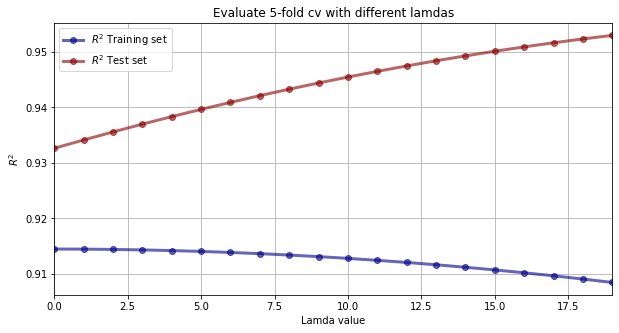

In [98]:
outp = cross_val_alpha(X, X_test, X_train, y_test, y_train)
outp